## <center>Project 2: Support Vector and Stochastic Gradient Descent Classification</center>

**Name: Doungporn Wiwatanapataphee**<br>
**Date created:** 9 March 2021<br>
**Last modified:** 13 March 2021<br>

### Contents

1. [Data loading and visualisation](#1)
2. [Data preparation and feature scaling](#2) <br>
    2.1 [Inspect Class](#2.1) <br>
    2.2 [Training and test set split](#2.2) <br>
    2.3 [Feature scaling](#2.3) <br>
3. [Support Vector Classifier](#3.)
4. [Stochastic Gradient Descent Classifer](#4.)
5. [Comparison and Discussion](#5.)
6. [References](#References)

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### 1. Data loading and visualisation <a class="anchor" id="1"></a>

Since the data is not always tidy, the exploration step is required to identify any missing values and data anomalies in order to determine the necessity of data cleaning or data transformation. For the inspection process the function `head()`, `info()`, `isnull()`, `describe()` and visualisation were employed.

In [3]:
beans = pd.read_excel("DryBeanDataset/Dry_Bean_Dataset.xlsx")
beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
beans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

The data consists of 13,611 observations with 17 attributes, which represents the features of 7 different registered dry beans. For the classification model, there are a total of 16 numerical features; 12 dimensions and 4 shape forms, whereas the last column is the ground truth used for validation.

In [5]:
# Check if there is any missing records
beans.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

There is no missing records found.

In [6]:
beans.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


The `describe()` function generates descriptive statistics that summarise the numeric attributes of the dataset. Since all the counts are equal to the total number of entries, we can conclude that there's no non-empty rows in the dataset. In addition, the statistics such as mean, standard deviation (std), minimum value (min), percentiles (25%, 50%, 75%), and maximum value (max) of each feature are produced.

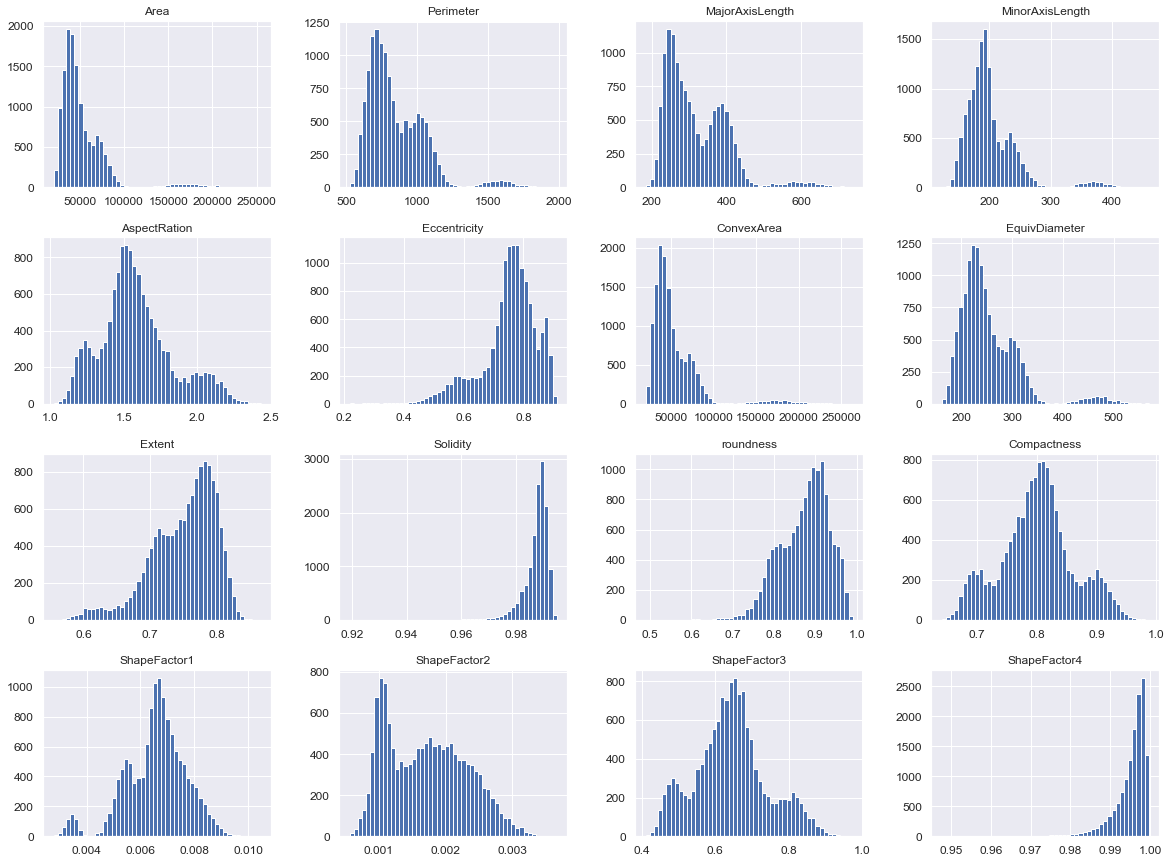

In [7]:
beans.hist(bins=50, figsize=(20,15));

The figure above shows the histograms of 16 dimensional features of dry bean seeds, which we can notice the following patterns:

1. It is noted that most of the histograms are either heavily left- or right-skewed, and they are either of uni- or multimodal distribution. The shape of the distributions suggests transformation might be useful for the classification process. <br>
<br>
2. Some of the attributes' distribution look quite similar in shape. For instance, <br>
    2.1 The distribution of attributes measured in pixel (**Area**, **Perimeter**, **MajorAxisLength**, **MinorAxisLength**, **ConvexArea**, and **EquivDiameter**) are heavily right-skewed and multimodal with the highest peak towards the left of the plot followed by a medium mode and a small mode. <br>
    2.2 **AspectRation** and **ShapeFactor3** are moderately right-skewed multimodal distributed with the highest peak between the two smaller modes. <br>
    2.3 **Eccentricity** and **Roundness** are heavily left-skewed multimodal distributed. <br>
    2.4 **Solidity** and **ShapeFactor4** are heavily left-skewed unimodal distributed. <br>
<br>
3. The attributes obviously have different scales. For example, ***Area**, **Perimeter**, **MajorAxisLength**, **MinorAxisLength**, **ConvexArea**, and **EquivDiameter** are measured in pixel count, whereas the other attributes are in ratio. Thus, feature scaling is required so that all the features can be comparable without bias. <br>
<br>
4. Koklu and Ozkan (2020) stated that some of these attributes were actually created using various combinations of attributes. For instance, the **Aspect ratio (K)** is the relationship between **MajorAxisLength (L)** and **MinorAxisLength (l)**, which defined as $K=\frac{L}{l}$. Thus, we may make use of these attribute combinations in further analysis. <br>
<br>
From the inspection, we can select 6 interesting features out of the 16 features: namely,

|       Feature      | Description                                                               |
|:-------------------|:--------------------------------------------------------------------------|
|    Perimeter (P)   | Bean circumference.                                                       |
|  Eccentricity (Ec) | Eccentricity of the elipse                                                |
|    Solidity (S)    | The ratio of the pixels in the convex shell to those found in beans,      |
|                    | which defined as $\text{S} = \frac{\text{Area}}{\text{Convex Area}}$      |
|  Compactness (CO)  | Measures the roundness of an object, which defined as                     |
|                    | $\text{CO}= \frac{\text{Equivatlent diameter}}{\text{Major axis length}}$ |
| ShapeFactor1 (SF1) | $\text{SF1} = \frac{\text{Major axis length}}{\text{Area}}$               |
| ShapeFactor2 (SF2) | $\text{SF2} = \frac{\text{Minor axis length}}{\text{Area}}$               |

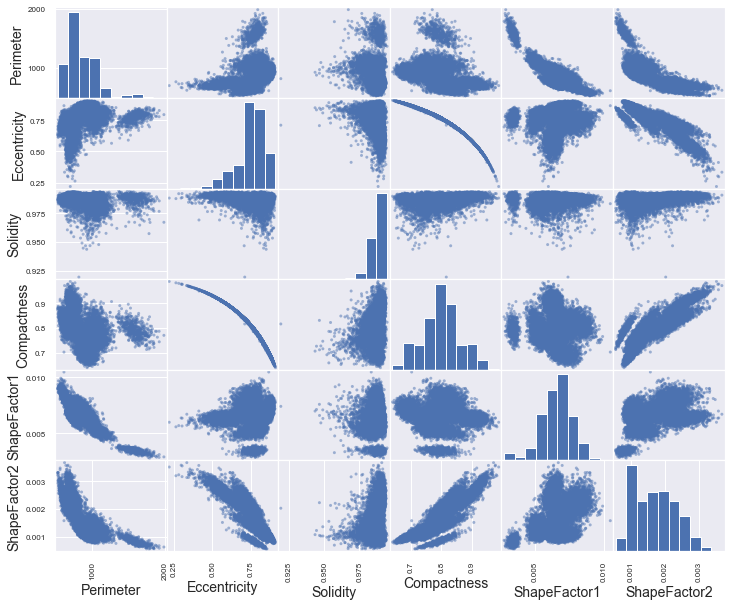

In [8]:
from pandas.plotting import scatter_matrix
attributes = ["Perimeter", "Eccentricity", "Solidity", 
              "Compactness", "ShapeFactor1", "ShapeFactor2"]
scatter_matrix(beans[attributes], figsize=(12, 10));

The figure above shows the pair plot of the selected 6 features generated from the `scatter_matrix()` function, which essentially plots the selected attributes against each other. We can notice the following:

1. The correlation between most of these features are very strong, espectially between **Perimeter** and the two Shape factors, **Eccentricity** and **ShapeFactor2**, **Compactness** and **Eccentricity**, and **Compactness** and **ShapeFactor2**. We can also check the correlation coefficient of these features using the `corr()` function. 

2. Multiple clusters are observed from most of the scatter plots. For instance, the scatter plot of **Perimeter** vs **Solidity** shows two distinct clusters, whereas the scatter plot of **Compactness** vs **ShapeFactor2** suggests the data might consists of more than two clusters.

In [9]:
beans[attributes].corr()

,Perimeter,Eccentricity,Solidity,Compactness,ShapeFactor1,ShapeFactor2
Perimeter,1.000000,0.391066,-0.303970,-0.406857,-0.864623,-0.767592
Eccentricity,0.391066,1.000000,-0.297592,-0.970313,0.019920,-0.860141
Solidity,-0.303970,-0.297592,1.000000,0.303766,0.153388,0.343559
Compactness,-0.406857,-0.970313,0.303766,1.000000,-0.009394,0.868939
ShapeFactor1,-0.864623,0.019920,0.153388,-0.009394,1.000000,0.469197
ShapeFactor2,-0.767592,-0.860141,0.343559,0.868939,0.469197,1.000000


### 2. Data preparation and feature scaling <a class="anchor" id="2"></a>

#### 2.1 Inspect Class <a class="anchor" id="2.1"></a>

Usually, classification algorithm is conducted around the assumption of balanced class where we have an equal number of instances for each class. However, most of the data suffer from the class imbalanced problem, which drastically affects the predictive performance, specifically for the minority class. <br>
<br>
To check the number of instances of each class, we can use the `value.counts()` function on the **Class** attribute, which returns the counts of unique values. <br>
<br>
From the output below, **BOMBAY** class consists of fewest instances (522).

In [10]:
beans['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

Note that the Class label is a string. We prefer numbers, so let’s convert it to integers by using `factorize()` function from pandas:

In [66]:
beans.Class = pd.factorize(beans.Class)[0]
print(beans.dtypes)

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class                int64
dtype: object


In [82]:
beans['Class'].value_counts()

6    3546
5    2636
0    2027
4    1928
3    1630
1    1322
2     522
Name: Class, dtype: int64

The `factorize()` function mapped the Class into integer as follows: <br>

| int | Class    |
|:----|:---------|
| 0   | SEKER    |
| 1   | BARBUNYA |
| 2   | BOMBAY   |
| 3   | CALI     |
| 4   | HOROZ    |
| 5   | SIRA     |
| 6   | DERMASON |

#### 2.2 Training and test set split <a class="anchor" id="2.2"></a>

Validation is essential to build a good classification model. In order to check for accuracy and precision of the model, we usually start by randomly splitting the data into two set, a training set where we feed the model-building algorithm, and a test set which we feed into the resulting model to verify its accuracy. <br>
<br>
In Python, `train_test_spit()` function from sklearn can be used to randomly split the data into training set (80%) and test set (20%).

In [67]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(beans, test_size=0.2, random_state=42)

The number of instances in the training and test set can be obtain from a `shape()` function. Usually, the `shape()` function returns the size of a dataframe, where the first and the second value represent the number of rows and the number of columns, respectively. Hence, we put the index 0 to extract the number of rows (instances). <br>
<br>
The following outputs show that there are 10888 and 2723 instances in the training set and test set, respectively.

In [68]:
train_set.shape[0]

10888

In [69]:
test_set.shape[0]

2723

#### 2.3 Feature scaling <a class="anchor" id="2.3"></a>

Previously, we observed that the attributes clearly have different scales. 
As a result, feature scaling should be performed to avoid classification with inconsistent units and to take into account the degree of difference in each attributes. <br>
<br>
In order to make the attributes coordinate-free and close to normally distributed, we standardise all the features to have a mean value of 0 and a standard deviation of 1. In Python, we can easily employ a function `StandardScaler()` from sklern to perform feature scaling on our training set. <br>
<br>
There are a number of methods which can be used together with `StandardScaler()`— namely, `fit()`, `fit_transfor()`, `transform()`, etc. The `fit()` function computes the mean and standard deviation to be used for later scaling. The `transform()` function performs standardisation by centering and scaling. Lastly, the `fit_transform()` function essentially fits to data and then transform it, which is equivalent to calling `fit()` and then `transform()`. <br>
<br>
For this dataset, the `fit_transform()` function was called on the training set in which the 'Class' attribute was dropped.

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(train_set.drop('Class', axis=1))
y_train = train_set['Class']

Once we have performed feature scaling using the `fit_transform()` function on the training data, we then apply the `transform()` function to the test data. By doing so, the transformation statistics have been computed using the training data only, and then we use these values to transform both training and test dataset. This is to avoid bias causing from data leakage when an information outside the training set is used to create the model.

In [71]:
X_test = scaler.transform(test_set.drop('Class', axis=1))
y_test = test_set['Class']

### 3. Support Vector Classifier <a class="anchor" id="3."></a>

In the section, we are going to use sklearn.svm.SVC class to perform a one-versus-one (OvO) binary classification on the training set. The OvO strategy trains a binary classifier for every pair of beans. For 7 classes of beans, we will have to train $7 \times (7-1) / 2 = 21$ classifier. <br>
<br>
The function `SVC()` is called with parameters `kernel='rbf'` and `decision_function_shape='ovo'`. The `decision_function_shape='ovo'` states that we perform the one-versus-one binary classification, whereas `'rbf'` or a Radial Basis Function is a kernel used in support vector machine classification. <br>
<br>
The RBF kernel depends on two hyperparameters: `C` and `gamma`, where regularisation parameter `C` trades off misclassification of training instances against decision surface's simplicity, and `gamma` defines how much influence a single training instance has. Thus, the value of `C` and `gamma` are critical to the SVM's performance, and we should try grid searching using GridSearchCV or RandomizedSearchCV to find appropriate value of `C` and `gamma`. <br>
<br>
First of all, we have to specify the possible values or a list of choices in a parameter grid. By default, `C` and `gamma` take value of `1` and `1 / (n_features * X.var()) = 1 / (16 * X_train.var()) = 0.0625`, respectively. So, we include these values in the grid as well. 
<br>
<br>
The below cell takes about 3.5 minutes to run (using the `%%time` command to measure the wall time for the entire code cell).

In [73]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'kernel': ['rbf'],
              'C': [1.0, 3.0, 10., 30., 100.],
              'gamma': [0.01, 0.03, 0.0625, 0.1, 0.3, 1.0]   
             }

svm_clf = SVC(decision_function_shape='ovo')
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ......................C=1.0, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END ......................C=1.0, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END ......................C=1.0, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END ......................C=1.0, gamma=0.01, kernel=rbf; total time=   1.6s
[CV] END ......................C=1.0, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END ......................C=1.0, gamma=0.03, kernel=rbf; total time=   1.1s
[CV] END ......................C=1.0, gamma=0.03, kernel=rbf; total time=   1.1s
[CV] END ......................C=1.0, gamma=0.03, kernel=rbf; total time=   1.2s
[CV] END ......................C=1.0, gamma=0.03, kernel=rbf; total time=   1.8s
[CV] END ......................C=1.0, gamma=0.03, kernel=rbf; total time=   1.4s
[CV] END ....................C=1.0, gamma=0.0625, kernel=rbf; total time=   1.0s
[CV] END ....................C=1.0, gamma=0.062

[CV] END ...................C=30.0, gamma=0.0625, kernel=rbf; total time=   0.9s
[CV] END ...................C=30.0, gamma=0.0625, kernel=rbf; total time=   0.9s
[CV] END ...................C=30.0, gamma=0.0625, kernel=rbf; total time=   0.9s
[CV] END ...................C=30.0, gamma=0.0625, kernel=rbf; total time=   0.9s
[CV] END ......................C=30.0, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END ......................C=30.0, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END ......................C=30.0, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END ......................C=30.0, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END ......................C=30.0, gamma=0.1, kernel=rbf; total time=   1.0s
[CV] END ......................C=30.0, gamma=0.3, kernel=rbf; total time=   1.5s
[CV] END ......................C=30.0, gamma=0.3, kernel=rbf; total time=   1.3s
[CV] END ......................C=30.0, gamma=0.3, kernel=rbf; total time=   1.3s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVC(decision_function_shape='ovo'),
             param_grid={'C': [1.0, 3.0, 10.0, 30.0, 100.0],
                         'gamma': [0.01, 0.03, 0.0625, 0.1, 0.3, 1.0],
                         'kernel': ['rbf']},
             scoring='neg_mean_squared_error', verbose=2)

In [74]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

0.6910751663005369

In [79]:
grid_search.best_params_

{'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}

From the above output, the parameter setting that gave the best results on the hold out data is `C = 10.0` and `gamma = 0.1`. Next, we fit the model on the training data. Then, we make a prediction based on the test data and generate a confusion matrix.

In [76]:
from sklearn.svm import SVC
svm_clf = SVC(C = 10.0, kernel='rbf', gamma = 0.1, decision_function_shape='ovo')
svm_clf.fit(X_train, y_train)

SVC(C=10.0, decision_function_shape='ovo', gamma=0.1)

In [77]:
from sklearn.metrics import confusion_matrix
y_test_pred = svm_clf.predict(X_test)
svm_conf_mx = confusion_matrix(y_test, y_test_pred)
svm_conf_mx

array([[396,   2,   0,   0,   0,   9,   6],
       [  1, 243,   0,  12,   0,   5,   0],
       [  0,   0, 117,   0,   0,   0,   0],
       [  1,  13,   0, 297,   5,   1,   0],
       [  0,   3,   0,   5, 388,   8,   4],
       [  4,   0,   0,   0,   5, 477,  50],
       [  6,   0,   0,   0,   1,  42, 622]], dtype=int64)

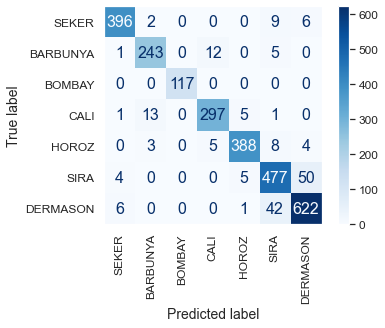

In [214]:
labels = ['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON']
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm_clf, X_test, y_test, 
                      cmap=plt.cm.Blues, display_labels=labels,
                      xticks_rotation='vertical')
plt.grid(False)
plt.show()

- The confusion matrix looks fine, as we observe big numbers along the main diagonal, which suggests the classifier perform well in beans classification.

- The classifier performs very well in prediction of BOMBAY beans as seen in the third column: 117 out of 117 BOMBAY beans have been classified correctly.

- Since we have imbalanced class with BOMBAY beans being to fewest, a slightly brighter colour in the third column of the matrix plot seems to be misleading.

- We can also compute the accuracy score by using function `accuracy_score()`. The obtained accuracy is 93.28% which is pretty good!

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.9327947117150202

### 4. Stochastic Gradient Descent classifier <a class="anchor" id="4."></a>

In this section, we are going to use Stochastic Gradient Descent (SGD) classifier. The classifier is known of its ability to handling very large datasets efficiently, as it picks a random instance in the training set at every step and computes the gradients rather than using the whole training set. Another advantage of SGD is the ease of implementation, as it can either be used to fit logistic regression with parameter `loss='log'`, or linear SVM with parameter `loss='hinge`. Moreover, concrete penalty such as L1 norm, L2, norm and elastic net, can be set via the `penalty` parameter. For the classification of dry beans, the loss function was left by default, and the elastic net is used as the penalty.<br>
<br>
Similarly to SVM, SGD requires a number of hyperparameters such as the learning rate, the regularisation term $\alpha$, the $\ell_1$ ratio used for `elasticnet` penalty, etc. One of the most important hyperparameter in Stochastic Gradien Descent is the size of the steps in which a cost function will be decreases, also known as learning rate ($\eta$). For SGDClassifier class, there are essentially three parameters which control the rate- namely, the initial learning rate `eta0`, the learning rate schedule `learning_rate`, and the regularisation term `alpha`. The following parameters' desciption is partially taken from [scikit-learn SGDclassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)<br>
<br>
- `eta0` defines the initial learning rate, and it is set to 0.0 by default. The parameter is not used by the learning rate schedule is set to ‘optimal’.
- `learning_rate` represents the learning rate schedule, and it is set to ‘optimal’ by default. The other options include ‘constant’, ‘invscaling’, and ‘adaptive’. The ‘constant’ option essentially implies that the learning rate is equal to it's initial value `eta0`. The ‘invscaling’ options, which also known as power scheduling, set the learning rate to a function of the iteration number $t$: $\eta(t)=\eta_0 / \text{pow}(t, \text{power_t})$. The ‘adaptive’ option set the learning rate as constant of `eta0` as long as the training keeps decreasing.
- `alpha` has default value of 0.0001. It determines how strong the regularisation and also used in the calculation of the learning rate when `learning_rate` is set to ‘optimal’. In this case, eta = 1.0 / (alpha * (t + t0)), which is proposed by Leon Bottou. <br>


For this problem, I decided to use the optimal learning rate schedule, so we left the `eta0` and `learning_rate` parameters as default and perform grid search for parameter `alpha`. <br>
<br>
However, SGD supports multiclass classification by combining binary classifiers in a one-versus-all (OvA) strategy by default. If we would like to force scikit-learn to use OvO strategy like in the previous section, we can pass the SGD classifier to `OneVsOneClassifier` class and slightly change the name of hyperparameter in the search space by adding `estimator__` in front of the regular SGD's parameters. <br>
<br>
For the search space, the parameter grid was defined as follows: <br>

- The first parameter, `estimator__average`, can take either boolean or integer . If it is set to `True`, the averaged SGD weights accross all updates will be computed and stores the in the `coef_` attribute. In this case, we try setting the average to either `True` or `False`. 

- The second parameter, `estimator__l1_ratio`, specify the $\ell_1$ ratio in which `l1_ratio=0` corresponds to L2 penalty and `l1_ratio=1` to L1 penalty. The $\ell_1$ ratio should be in the range from 0 to 1, so the command `np.linspace(0, 1, num=10)` was passed to the parameter grid. 

- Lastly, the `alpha` parameter specifies the constant that multiplies the regularisation term. The $\alpha$ usually take values from 0 to 1, where  higher alpha will result in a strong regularisation. In the below code cell, the automatic hyperparameter search for $\alpha$ is done in the range `np.power(10, np.arange(-4, 1, dtype=float))`. <br>
<br>

Once the parameter grid was defined, then we performed a grid search using `GridSearchCV()`. The following cell takes about 1.5 minutes to search for the best parameters for the classifier. Again, `%%time` command is employed to measure the total runtime of code cell.

In [149]:
%%time
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import SGDClassifier

sgd_clf = OneVsOneClassifier(SGDClassifier(random_state=42,
                                           penalty='elasticnet'))

param_grid = {'estimator__average': [True, False],
              'estimator__l1_ratio': np.linspace(0, 1, num=10),
              'estimator__alpha': np.power(10, np.arange(-4, 1, dtype=float))}
grid_search = GridSearchCV(sgd_clf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END estimator__alpha=0.0001, estimator__average=True, estimator__l1_ratio=0.0; total time=   0.1s
[CV] END estimator__alpha=0.0001, estimator__average=True, estimator__l1_ratio=0.0; total time=   0.1s
[CV] END estimator__alpha=0.0001, estimator__average=True, estimator__l1_ratio=0.0; total time=   0.1s
[CV] END estimator__alpha=0.0001, estimator__average=True, estimator__l1_ratio=0.0; total time=   0.1s
[CV] END estimator__alpha=0.0001, estimator__average=True, estimator__l1_ratio=0.0; total time=   0.1s
[CV] END estimator__alpha=0.0001, estimator__average=True, estimator__l1_ratio=0.1111111111111111; total time=   0.1s
[CV] END estimator__alpha=0.0001, estimator__average=True, estimator__l1_ratio=0.1111111111111111; total time=   0.1s
[CV] END estimator__alpha=0.0001, estimator__average=True, estimator__l1_ratio=0.1111111111111111; total time=   0.1s
[CV] END estimator__alpha=0.0001, estimator__average=True, estimator

[CV] END estimator__alpha=0.0001, estimator__average=False, estimator__l1_ratio=0.4444444444444444; total time=   0.2s
[CV] END estimator__alpha=0.0001, estimator__average=False, estimator__l1_ratio=0.4444444444444444; total time=   0.1s
[CV] END estimator__alpha=0.0001, estimator__average=False, estimator__l1_ratio=0.4444444444444444; total time=   0.1s
[CV] END estimator__alpha=0.0001, estimator__average=False, estimator__l1_ratio=0.4444444444444444; total time=   0.1s
[CV] END estimator__alpha=0.0001, estimator__average=False, estimator__l1_ratio=0.5555555555555556; total time=   0.1s
[CV] END estimator__alpha=0.0001, estimator__average=False, estimator__l1_ratio=0.5555555555555556; total time=   0.1s
[CV] END estimator__alpha=0.0001, estimator__average=False, estimator__l1_ratio=0.5555555555555556; total time=   0.1s
[CV] END estimator__alpha=0.0001, estimator__average=False, estimator__l1_ratio=0.5555555555555556; total time=   0.1s
[CV] END estimator__alpha=0.0001, estimator__ave

[CV] END estimator__alpha=0.001, estimator__average=True, estimator__l1_ratio=0.8888888888888888; total time=   0.1s
[CV] END estimator__alpha=0.001, estimator__average=True, estimator__l1_ratio=0.8888888888888888; total time=   0.1s
[CV] END estimator__alpha=0.001, estimator__average=True, estimator__l1_ratio=1.0; total time=   0.2s
[CV] END estimator__alpha=0.001, estimator__average=True, estimator__l1_ratio=1.0; total time=   0.1s
[CV] END estimator__alpha=0.001, estimator__average=True, estimator__l1_ratio=1.0; total time=   0.2s
[CV] END estimator__alpha=0.001, estimator__average=True, estimator__l1_ratio=1.0; total time=   0.1s
[CV] END estimator__alpha=0.001, estimator__average=True, estimator__l1_ratio=1.0; total time=   0.1s
[CV] END estimator__alpha=0.001, estimator__average=False, estimator__l1_ratio=0.0; total time=   0.1s
[CV] END estimator__alpha=0.001, estimator__average=False, estimator__l1_ratio=0.0; total time=   0.1s
[CV] END estimator__alpha=0.001, estimator__averag

[CV] END estimator__alpha=0.01, estimator__average=True, estimator__l1_ratio=0.3333333333333333; total time=   0.1s
[CV] END estimator__alpha=0.01, estimator__average=True, estimator__l1_ratio=0.3333333333333333; total time=   0.1s
[CV] END estimator__alpha=0.01, estimator__average=True, estimator__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END estimator__alpha=0.01, estimator__average=True, estimator__l1_ratio=0.3333333333333333; total time=   0.1s
[CV] END estimator__alpha=0.01, estimator__average=True, estimator__l1_ratio=0.4444444444444444; total time=   0.1s
[CV] END estimator__alpha=0.01, estimator__average=True, estimator__l1_ratio=0.4444444444444444; total time=   0.1s
[CV] END estimator__alpha=0.01, estimator__average=True, estimator__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END estimator__alpha=0.01, estimator__average=True, estimator__l1_ratio=0.4444444444444444; total time=   0.1s
[CV] END estimator__alpha=0.01, estimator__average=True, estimator__l1_r

[CV] END estimator__alpha=0.01, estimator__average=False, estimator__l1_ratio=0.7777777777777777; total time=   0.0s
[CV] END estimator__alpha=0.01, estimator__average=False, estimator__l1_ratio=0.7777777777777777; total time=   0.0s
[CV] END estimator__alpha=0.01, estimator__average=False, estimator__l1_ratio=0.8888888888888888; total time=   0.0s
[CV] END estimator__alpha=0.01, estimator__average=False, estimator__l1_ratio=0.8888888888888888; total time=   0.0s
[CV] END estimator__alpha=0.01, estimator__average=False, estimator__l1_ratio=0.8888888888888888; total time=   0.0s
[CV] END estimator__alpha=0.01, estimator__average=False, estimator__l1_ratio=0.8888888888888888; total time=   0.0s
[CV] END estimator__alpha=0.01, estimator__average=False, estimator__l1_ratio=0.8888888888888888; total time=   0.0s
[CV] END estimator__alpha=0.01, estimator__average=False, estimator__l1_ratio=1.0; total time=   0.0s
[CV] END estimator__alpha=0.01, estimator__average=False, estimator__l1_ratio=1

[CV] END estimator__alpha=0.1, estimator__average=False, estimator__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END estimator__alpha=0.1, estimator__average=False, estimator__l1_ratio=0.2222222222222222; total time=   0.1s
[CV] END estimator__alpha=0.1, estimator__average=False, estimator__l1_ratio=0.2222222222222222; total time=   0.1s
[CV] END estimator__alpha=0.1, estimator__average=False, estimator__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END estimator__alpha=0.1, estimator__average=False, estimator__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END estimator__alpha=0.1, estimator__average=False, estimator__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END estimator__alpha=0.1, estimator__average=False, estimator__l1_ratio=0.3333333333333333; total time=   0.1s
[CV] END estimator__alpha=0.1, estimator__average=False, estimator__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END estimator__alpha=0.1, estimator__average=False, estimator__l1_r

[CV] END estimator__alpha=1.0, estimator__average=True, estimator__l1_ratio=0.7777777777777777; total time=   0.2s
[CV] END estimator__alpha=1.0, estimator__average=True, estimator__l1_ratio=0.7777777777777777; total time=   0.1s
[CV] END estimator__alpha=1.0, estimator__average=True, estimator__l1_ratio=0.7777777777777777; total time=   0.1s
[CV] END estimator__alpha=1.0, estimator__average=True, estimator__l1_ratio=0.7777777777777777; total time=   0.1s
[CV] END estimator__alpha=1.0, estimator__average=True, estimator__l1_ratio=0.8888888888888888; total time=   0.1s
[CV] END estimator__alpha=1.0, estimator__average=True, estimator__l1_ratio=0.8888888888888888; total time=   0.1s
[CV] END estimator__alpha=1.0, estimator__average=True, estimator__l1_ratio=0.8888888888888888; total time=   0.1s
[CV] END estimator__alpha=1.0, estimator__average=True, estimator__l1_ratio=0.8888888888888888; total time=   0.0s
[CV] END estimator__alpha=1.0, estimator__average=True, estimator__l1_ratio=0.88

GridSearchCV(cv=5,
             estimator=OneVsOneClassifier(estimator=SGDClassifier(penalty='elasticnet',
                                                                  random_state=42)),
             param_grid={'estimator__alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                         'estimator__average': [True, False],
                         'estimator__l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])},
             scoring='neg_mean_squared_error', verbose=2)

In [155]:
grid_search.best_params_

{'estimator__alpha': 0.001,
 'estimator__average': False,
 'estimator__l1_ratio': 0.6666666666666666}

Once the hyperparameters' value are obtained, we then move on to fit the model on the training data, make prediction based on the test data, generate confusion matrix, and obtain the accuracy score.

In [151]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import SGDClassifier
sgd_clf = OneVsOneClassifier(SGDClassifier(alpha=0.001,
                                           average=False,
                                           l1_ratio=0.6666666666666666,
                                           random_state=42,
                                           penalty='elasticnet'))
sgd_clf.fit(X_train, y_train)
sgd_clf.predict(X_test)

array([0, 1, 0, ..., 6, 3, 6], dtype=int64)

In [152]:
y_test_pred_sgd = sgd_clf.predict(X_test)
sgd_conf_mx = confusion_matrix(y_test, y_test_pred_sgd)
sgd_conf_mx

array([[389,   5,   0,   0,   0,   7,  12],
       [  1, 239,   0,  15,   1,   5,   0],
       [  0,   0, 117,   0,   0,   0,   0],
       [  1,  11,   0, 301,   3,   1,   0],
       [  0,   1,   0,   5, 393,   5,   4],
       [  5,   0,   0,   0,   6, 470,  55],
       [  7,   0,   0,   0,   0,  44, 620]], dtype=int64)

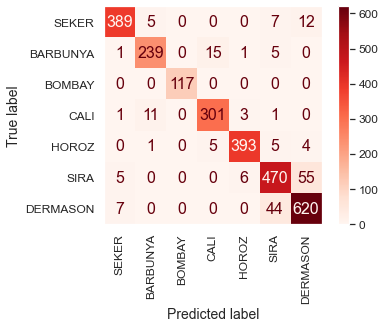

In [215]:
plot_confusion_matrix(sgd_clf, X_test, y_test, 
                      cmap=plt.cm.Reds, display_labels=labels,
                      xticks_rotation='vertical') 
plt.grid(False)
plt.show()

In [156]:
accuracy_score(y_test, y_test_pred_sgd)

0.9287550495776716

- The confusion matrix looks just as good as what we obtained from the SVC, as big numbers are observed along the main diagonal. 

- 117 out of 177 BOMBAY beans had been classified correctly. This suggests that the SGD classifier performs very well in prediction of BOMBAY beans.

- The colour of the matrix plot is deceptive as we have imbalanced dry beans class.

- the accuracy score obtained accuracy is 92.88%.

### 5. Comparison and Discussion <a class="anchor" id="5."></a>

Previously, we have conducted the one-versus-one binary classification on the training set using the Support Vector Machine (SVM) and Stochastic Gradient Descent (SGD) approaches. The confusion matrices resulted from the prediction based on test dataset of the two classifiers are generated. <br>
<br>
With imbalanced class, the colour of the confusion matrix plots can be a bit misleading. Alternatively, the option `Normalize='true'` is passed to the `plot_confusion_matrix()` function so that we will be able to inspect the classification rates. In addition, the `classification_report()` function can be employed to build a text report showing the main classification metrics-namely, precision, recall, f1-score, support for each class and as an average. The reported averages include macro average and weighted average. The macro average calculates metrics for each label and finds their unweighted mean regardless of the label imbalance. The weighted average calculates matrics for and finds their average weighted by the number of true instances for each class (support).<br>
<br>
From an inspection of confusion matrices and classification reports, we can summarise some key findings: <br>

- The confusion matrices looks almost identical with a little difference in class distribution. Big numbers and high classification rates ($\gt 85$) along the main diagonal of confusion matrices are observed, which suggests that both model perform fairly well in classification of 7 dry bean species.

- From the classification reports, both models have the accuracy rate of over 90%, where the SVM model has the higest accuracy of 93.28%. In addition, the SVM model has obtained higher values in all other average performance metrics. As a result, the proposed classifier based on SVM is considered to be more favourable in terms of the classification of dry beans.

- Both model obtained 100% accuracy rate for the prediction of BOMBAY beans, which has the fewest number of instances. This suggests that the classification rate tends to be higher for dry bean species which contain lower number of observations.

- Both model have the lowest classification performance for SIRA beans. It is noticeable that quite a number of misclassifications happen between SIRA and DERMASON beans, which suggests that these two species might share some common traits apart from size and shape factors. Therefore, the classification result might be improved if we could obtain more features such as colour, texture, or thickness (obtain 3D image) of the beans.

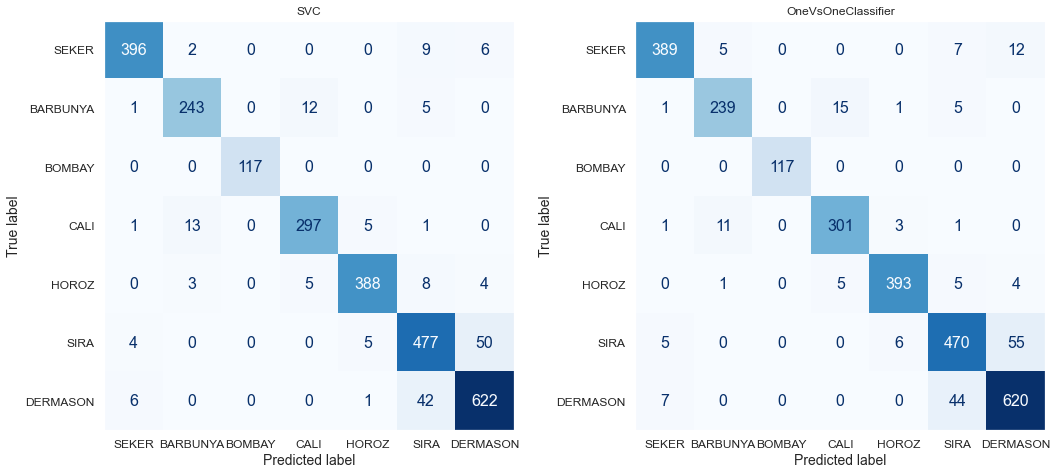

In [220]:
# Confusion matrices
classifiers = [svm_clf, sgd_clf]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, X_test, y_test, ax=ax,
                          cmap='Blues', display_labels=labels,
                          colorbar=False)
    ax.title.set_text(type(cls).__name__)
    ax.grid(False)
plt.tight_layout()
plt.show()

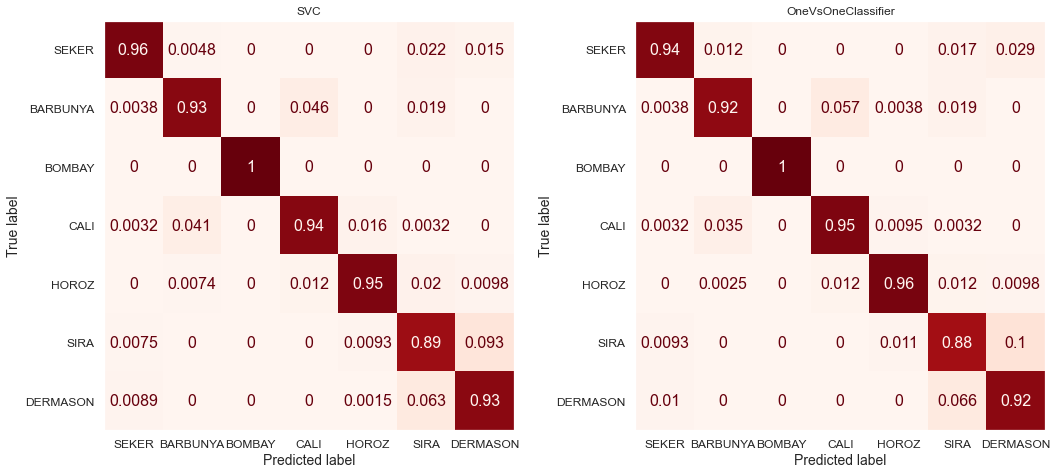

In [221]:
# set Normalize='true' to see the classification rates
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, X_test, y_test, ax=ax, 
                          cmap='Reds', display_labels=labels,
                          colorbar=False, normalize='true')
    ax.title.set_text(type(cls).__name__)
    ax.grid(False)
plt.tight_layout()  
plt.show()

In [208]:
# Classification report of SVC
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred, 
                            target_names=labels, digits=4))

              precision    recall  f1-score   support

       SEKER     0.9706    0.9588    0.9647       413
    BARBUNYA     0.9310    0.9310    0.9310       261
      BOMBAY     1.0000    1.0000    1.0000       117
        CALI     0.9459    0.9369    0.9414       317
       HOROZ     0.9724    0.9510    0.9616       408
        SIRA     0.8801    0.8899    0.8850       536
    DERMASON     0.9120    0.9270    0.9194       671

    accuracy                         0.9328      2723
   macro avg     0.9446    0.9421    0.9433      2723
weighted avg     0.9332    0.9328    0.9330      2723



In [209]:
# Classification report of SGDClassifier
print(classification_report(y_test, y_test_pred_sgd, 
                            target_names=labels, digits=4))

              precision    recall  f1-score   support

       SEKER     0.9653    0.9419    0.9534       413
    BARBUNYA     0.9336    0.9157    0.9246       261
      BOMBAY     1.0000    1.0000    1.0000       117
        CALI     0.9377    0.9495    0.9436       317
       HOROZ     0.9752    0.9632    0.9692       408
        SIRA     0.8835    0.8769    0.8801       536
    DERMASON     0.8973    0.9240    0.9104       671

    accuracy                         0.9288      2723
   macro avg     0.9418    0.9387    0.9402      2723
weighted avg     0.9291    0.9288    0.9289      2723



### References <a class="anchor" id="References"></a>

Geron, A. (2019). *Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (2nd ed.)* O’Reilly. Sebastopol, CA.

Koklu, M. and I. Ozkan. (2020). *Multiclass classification of dry beans using computer vision and machine learning techniques.* Comput. Electron. Agric. 174. https://doi.org/10.1016/j.compag.2020.105507. <br>
<br>
Pedregosa et al. “Scikit-learn: Machine Learning in Python Documentation.” https://scikit-learn.org/stable/index.html. <br>